<a href="https://colab.research.google.com/github/RSevaraN/yakuniy-deep-learning/blob/main/KNN_tayyor_proyekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer

In [27]:
df = pd.read_csv('DATAKNN.csv')

In [18]:


d = {'Qoniqarli':0, 'Yaxshi':1, 'A_lo':2}
df['Davomat'] = df['Davomat'].map(d)

d = {'Ba_zan ':0, 'Har_doim':1}
df['Darsda_qatnashishi'] = df['Darsda_qatnashishi'].map(d)

d = {'Qoniqarli':0, 'Yaxshi':1, 'Tuliq':2}
df['Daftar'] = df['Daftar'].map(d)

d = {'Ha_sohaga_oid_emas': 0, 'Yuq': 1, 'Ha_sohaga_oid': 2}
df['Qushimcha_ish'] = df['Qushimcha_ish'].map(d)

d = { 'Yuq': 0, 'Ha': 1}
df['Tugarak_yoki_kurs'] = df['Tugarak_yoki_kurs'].map(d)

cclass = df.Class
df.drop('Class', axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)
#print(df)
#print(cclass)


In [19]:

Xtrain, Xtest, y_train, y_test = train_test_split(df, cclass, train_size = 0.8)



In [20]:
# qushimcha qushildi
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
Xtrain = imputer.fit_transform(Xtrain) # Fit and transform on training data
Xtest = imputer.transform(Xtest)

Standartlashtirish:

Optimal k qiymati: 10
0.9285714285714286


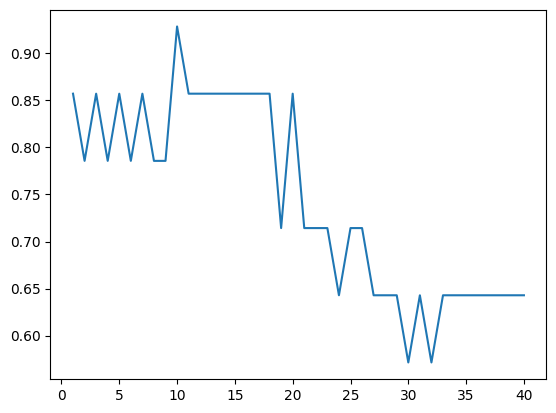

In [22]:

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

import matplotlib.pyplot as plt

k=list(range(1, 41))
acc = []

for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(Xtrain, y_train)
  y_pred = knn.predict(Xtest)
  acc.append(accuracy_score(y_test, y_pred))


plt.plot(k, acc)

optimal_k = k[np.argmax(acc)]
print(f'Optimal k qiymati: {optimal_k}')
print(acc[optimal_k-1])


Normallashtirish:

Optimal k qiymati: 3
0.9285714285714286


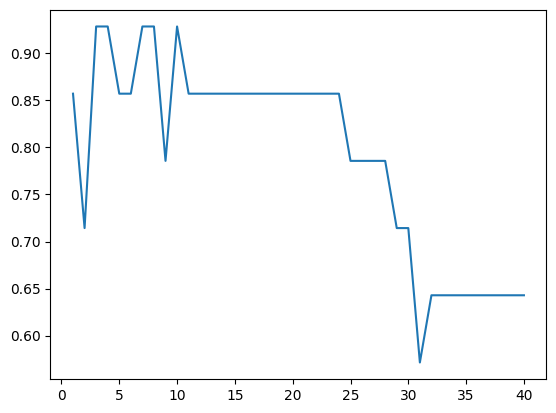

In [23]:
min_max_scaler = MinMaxScaler()
Xtrain = min_max_scaler.fit_transform(Xtrain)
Xtest = min_max_scaler.transform(Xtest)

import matplotlib.pyplot as plt

k=list(range(1, 41))
acc = []
for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(Xtrain, y_train)
  y_pred = knn.predict(Xtest)
  acc.append(accuracy_score(y_test, y_pred))

plt.plot(k, acc)

optimal_k = k[np.argmax(acc)]
print(f'Optimal k qiymati: {optimal_k}')
print(acc[optimal_k-1])

In [24]:
k = int(input("K ning qiymatini kiriting: "))
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)
print("Model aniqligi:", accuracy_score(y_test, y_pred))

K ning qiymatini kiriting: 3
Model aniqligi: 0.9285714285714286


In [25]:
new_Davomat = int(input("Davomatning qiymatini kiriting: "))
new_Darsda_qatnashishi= int(input("Darsda_qatnashishi ning qiymatini kiriting: "))
new_Amaliyot_bahosi = int(input("Amaliyot bahosining  qiymatini kiriting: "))
new_Mustaqil_ta_lim = int(input("Mustaqil ta'lim bahosining  qiymatini kiriting: "))
new_Daftar = int(input(" Daftar ning qiymatini kiriting: "))
new_Qushimcha_ish = int(input(" Qushimcha_ish ning qiymatini kiriting: "))
new_Tugarak_yoki_kurs=int(input("Tugarak_yoki_kursning qiymatini kiriting: "))
new_Laboratoriya_bahosi=int(input("Laboratoriya bahosining  qiymatini kiriting: "))
new_instance = [(new_Davomat,new_Darsda_qatnashishi,new_Amaliyot_bahosi,new_Mustaqil_ta_lim,new_Daftar, new_Qushimcha_ish,new_Tugarak_yoki_kurs,
                 new_Laboratoriya_bahosi )]
print(new_instance)
print(knn.predict(new_instance))

Davomatning qiymatini kiriting: 3
Darsda_qatnashishi ning qiymatini kiriting: 4
Amaliyot bahosining  qiymatini kiriting: 5
Mustaqil ta'lim bahosining  qiymatini kiriting: 5
 Daftar ning qiymatini kiriting: 2
 Qushimcha_ish ning qiymatini kiriting: 2
Tugarak_yoki_kursning qiymatini kiriting: 2
Laboratoriya bahosining  qiymatini kiriting: 4
[(3, 4, 5, 5, 2, 2, 2, 4)]
[5]
